# Project - Convolutional Neural Networks: Street View Housing Number Digit Recognition






### Context: 

The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications. The Street View House Numbers (SVHN) dataset is one of the most popular ones. It has been used in neural networks created by Google to read house numbers and match them to their geolocations. This is a great benchmark dataset to play with, learn and train models that accurately identify street numbers, and incorporate into all sorts of projects.

### Objective:

The objective of the exercise is to perform an image classification exercise on the given dataset to come up with a model that can help identify the digit images which have issues like picture brightness, blurriness. 

### More about the dataset

- The dataset is provided as a .h5 file. The basic preprocessing steps have been done.

### Mount the drive
Let us start by mounting the drive.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check for the version of installed tensorflow.

In [4]:
import tensorflow as tf
print(tf.__version__)

2.7.0


### Load the dataset
- Let us now, load the dataset that is available as a .h5 file.
- Split the data into train and the test dataset

In [5]:
import h5py
import numpy as np

# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]


# Close this file
h5f.close()

Let us import the required libraries now.

In [6]:
## Importing the required libraries
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

### Visualising images
- Use X_train to visualise the first 10 images.
- Use Y_train to print the first 10 labels

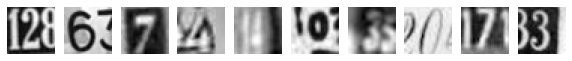

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [7]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train1[0:10]))

### Data preparation

- Printing the first image in the train image and figure out the shape of the images
- Reshaping the train and the test dataset to make them fit the first convolutional operation that we will create later. Figure out the required shape
- Normalising the train and the test dataset by dividing by 255.
- Printing the new shapes of the train and the test set.
- One hot encoding the target variables

In [8]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [9]:
# Reshaping the dataset to flatten them. Remember that we are trying to reshape the 2D image data into a 1D array

x_train = X_train.reshape(X_train.shape[0], 32,32,1)
x_test = X_test.reshape(X_test.shape[0], 32,32,1)

In [10]:
# Normalize inputs from 0-255 to 0-1

x_train = x_train / 255.0
x_test = x_test / 255.0

In [11]:
# New shape 

print('Training set:', x_train.shape, y_train1.shape)
print('Test set:', x_test.shape, y_test1.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


In [12]:
# one hot encode output
y_train = to_categorical(y_train1)
y_test = to_categorical(y_test1)

### Model Building
- Write a function that returns a sequential model with the following architecture
 - First Convolutional layer with 16 filters and kernel size =3. Use the 'same' padding and provide apt input shape.
 - Add a leaky relu layer next with the value 0.1
 - First Convolutional layer with 32 filters and kernel size =3. Use the 'same' padding.
 - Another leakyRelu same as above.
 - A maxpooling layer with pool size of 2
 - Flatten the output from the previous layer
 - Add a dense layer with 32 nodes
 - Add a leakyRelu layer with slope(0.1)
 - Add the final output layer with nodes equal to the number of classes and softmax activation.
 - Compile the model with the categorical_crossentropy loss, adam optmizers (lr = 0.001) and accuracy metric.
- Calling the model and print the model summary
- Fiting the model on the train data with a validation split of 0.2, batch size = 32, verbose = 1 and 20 epochs. Store the model building history to use it later for visualisation.
- printing the summary of the model. 


In [13]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers


def cnn_model_1():
    model_1 = Sequential()  
    model_1 = Sequential()
    model_1.add(Conv2D(filters=16, kernel_size=3, padding="same", input_shape=(32, 32, 1)))
    model_1.add(LeakyReLU(0.1))
    model_1.add(Conv2D(filters=32, kernel_size=3, padding='same'))
    model_1.add(LeakyReLU(0.1))
    model_1.add(MaxPool2D(pool_size=2))
    model_1.add(Flatten())
    model_1.add(Dense(32))
    model_1.add(LeakyReLU(0.1))
    model_1.add(Dense(10, activation='softmax'))
    adam = optimizers.Adam(lr=1e-3)
    model_1.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
    return model_1

In [14]:
model_1 = cnn_model_1()
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
# Fit the model
history_model_1 = model_1.fit(x_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
1050/1050 [==============================] - 39s 8ms/step - loss: 1.0841 - accuracy: 0.6518 - val_loss: 0.6329 - val_accuracy: 0.8164
Epoch 2/20
1050/1050 [==============================] - 8s 8ms/step - loss: 0.5526 - accuracy: 0.8387 - val_loss: 0.5690 - val_accuracy: 0.8401
Epoch 3/20
1050/1050 [==============================] - 9s 8ms/step - loss: 0.4591 - accuracy: 0.8660 - val_loss: 0.4974 - val_accuracy: 0.8552
Epoch 4/20
1050/1050 [==============================] - 9s 8ms/step - loss: 0.4008 - accuracy: 0.8830 - val_loss: 0.4769 - val_accuracy: 0.8648
Epoch 5/20
1050/1050 [==============================] - 8s 8ms/step - loss: 0.3520 - accuracy: 0.8947 - val_loss: 0.4641 - val_accuracy: 0.8702
Epoch 6/20
1050/1050 [==============================] - 8s 8ms/step - loss: 0.3151 - accuracy: 0.9067 - val_loss: 0.4600 - val_accuracy: 0.8730
Epoch 7/20
1050/1050 [==============================] - 8s 8ms/step - loss: 0.2805 - accuracy: 0.9172 - val_loss: 0.4633 - val_accuracy

### Plotting the validation and training accuracies

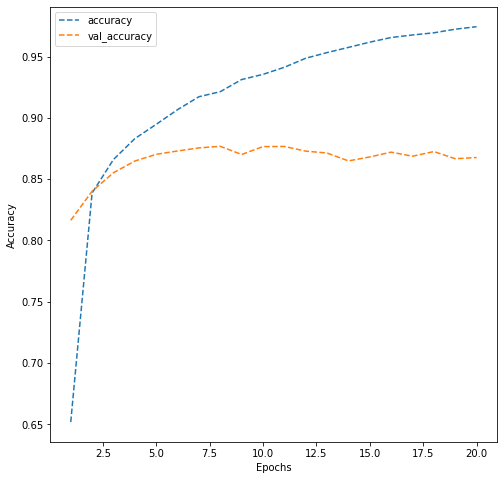

In [16]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Comments**
- There is some amount of overfitting here.

### Iteration 2
- Experimenting with adding dropout layers to make the model generalise better and report the results.
- Explored various architectures that can helped in generalising better.

In [17]:
def cnn_model_2():
    # initialized a sequential model
    model_2 = Sequential()
    model_2.add(Conv2D(filters=16, kernel_size=3, padding="same", input_shape=(32, 32, 1)))
    model_2.add(LeakyReLU(0.1))
    model_2.add(Conv2D(filters=32, kernel_size=3, padding='same'))
    model_2.add(LeakyReLU(0.1))
    model_2.add(MaxPool2D(pool_size=2))
    model_2.add(Dropout(0.25))
    model_2.add(Conv2D(filters=32, kernel_size=3, padding='same'))
    model_2.add(LeakyReLU(0.1))
    model_2.add(Conv2D(filters=64, kernel_size=3, padding='same'))
    model_2.add(LeakyReLU(0.1))
    model_2.add(MaxPool2D(pool_size=2))
    model_2.add(Dropout(0.25))
    model_2.add(Flatten())
    model_2.add(Dense(32))
    model_2.add(LeakyReLU(0.1))
    model_2.add(Dropout(0.5))
    model_2.add(Dense(10, activation='softmax'))
    adam = optimizers.Adam(lr=1e-3)
    model_2.add(Dense(10, activation='softmax'))
    model_2.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
    return model_2

In [18]:
model_2 = cnn_model_2()
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [19]:
# Fit the model
history_model_2 = model_2.fit(x_train, y_train, validation_split=0.2, epochs=40, batch_size=32, verbose=1)

Epoch 1/40
1050/1050 [==============================] - 18s 16ms/step - loss: 2.2239 - accuracy: 0.1673 - val_loss: 1.9118 - val_accuracy: 0.3283
Epoch 2/40
1050/1050 [==============================] - 17s 16ms/step - loss: 1.7567 - accuracy: 0.3375 - val_loss: 1.5712 - val_accuracy: 0.3465
Epoch 3/40
1050/1050 [==============================] - 15s 15ms/step - loss: 1.5305 - accuracy: 0.3638 - val_loss: 1.4211 - val_accuracy: 0.3745
Epoch 4/40
1050/1050 [==============================] - 15s 15ms/step - loss: 1.4259 - accuracy: 0.3972 - val_loss: 1.2801 - val_accuracy: 0.4510
Epoch 5/40
1050/1050 [==============================] - 15s 14ms/step - loss: 1.2913 - accuracy: 0.4428 - val_loss: 1.1919 - val_accuracy: 0.4773
Epoch 6/40
1050/1050 [==============================] - 16s 16ms/step - loss: 1.2139 - accuracy: 0.4636 - val_loss: 1.1093 - val_accuracy: 0.4870
Epoch 7/40
1050/1050 [==============================] - 17s 16ms/step - loss: 1.1541 - accuracy: 0.4926 - val_loss: 1.1097 -

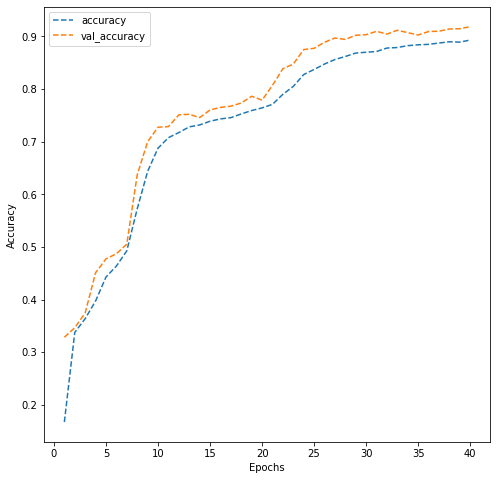

In [20]:
# plotting the accuracies

dict_hist_2 = history_model_2.history
list_ep = [i for i in range(1,41)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist_2['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist_2['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

#### Comments:
The overfitting has significantly reduced.

### Test set prediction and final comments (Using the better model of the two iterations)
- predict on the test set and comment on the resultls obtained.


In [21]:
# predict on the test dataset
test_pred = np.argmax(model_2.predict(x_test), axis = -1)

from sklearn.metrics import classification_report
print(classification_report(y_test1, test_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1814
           1       0.91      0.92      0.92      1828
           2       0.95      0.93      0.94      1803
           3       0.91      0.89      0.90      1719
           4       0.93      0.93      0.93      1812
           5       0.92      0.91      0.91      1768
           6       0.91      0.90      0.90      1832
           7       0.94      0.93      0.94      1808
           8       0.84      0.90      0.87      1812
           9       0.93      0.90      0.91      1804

    accuracy                           0.92     18000
   macro avg       0.92      0.92      0.92     18000
weighted avg       0.92      0.92      0.92     18000



#### Comments
- The accuracy is 0.91 on the test set. This is comparable with the results on the train and the validation set.
- The recall and precision values are good for all the classes.

